In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
#give path of training dataset
training_data = train.flow_from_directory('C:\\Users\\91735\\Downloads\\archive (6)\\Face Mask Dataset\\Train\\', target_size = (200,200),
                                         batch_size = 3, class_mode = 'binary')

val_data = train.flow_from_directory('C:\\Users\\91735\\Downloads\\archive (6)\\Face Mask Dataset\\Validation\\', target_size = (200,200),
                                         batch_size = 3, class_mode = 'binary')

Found 6147 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [4]:
#check path of dataset
os.getcwd()

'C:\\Users\\91735\\Downloads\\archive (4)'

In [5]:
#check training dataset class
training_data.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [6]:
#check binary class in the dataset
training_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
#create Neural Network
#in the last layer i use sigmoid to classify binary value
model=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(12,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid') 
                                  ])

In [8]:
#compile model
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),   #learning rate=0.001
             metrics=['accuracy'])

C:\Users\91735\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
#train the model
model_fit = model.fit(training_data,steps_per_epoch=20,epochs=10,validation_data=val_data)

Epoch 1/10
20/20 [==============================] - 30s 1s/step - loss: 1.3497 - accuracy: 0.5667 - val_loss: 0.6025 - val_accuracy: 0.9337
Epoch 2/10
20/20 [==============================] - 18s 904ms/step - loss: 0.6296 - accuracy: 0.6833 - val_loss: 0.5252 - val_accuracy: 0.7325
Epoch 3/10
20/20 [==============================] - 17s 867ms/step - loss: 0.5945 - accuracy: 0.8500 - val_loss: 0.4841 - val_accuracy: 0.7837
Epoch 4/10
20/20 [==============================] - 17s 851ms/step - loss: 0.3987 - accuracy: 0.8167 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 16s 830ms/step - loss: 0.2502 - accuracy: 0.8833 - val_loss: 0.1528 - val_accuracy: 0.9513
Epoch 6/10
20/20 [==============================] - 17s 876ms/step - loss: 0.1841 - accuracy: 0.9667 - val_loss: 0.1474 - val_accuracy: 0.9538
Epoch 7/10
20/20 [==============================] - 17s 899ms/step - loss: 0.4211 - accuracy: 0.8833 - val_loss: 0.2505 - val_accuracy: 0.9050
Ep

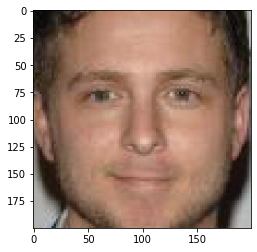

Without Mask


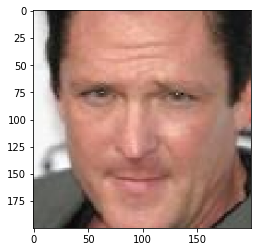

Without Mask


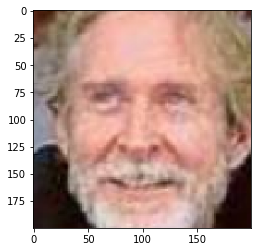

Without Mask


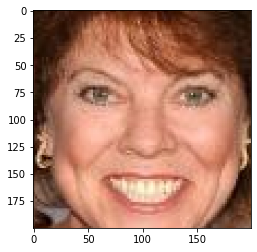

Without Mask


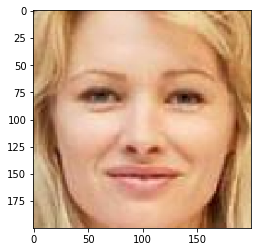

Without Mask


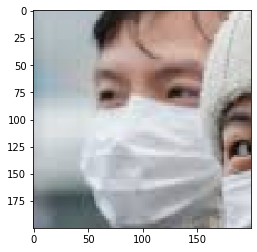

Mask


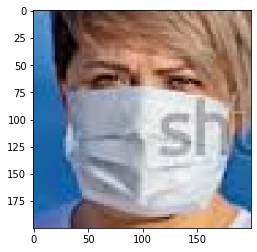

Mask


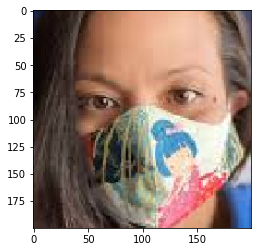

Mask


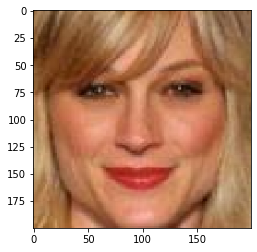

Without Mask


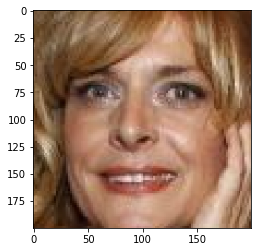

Without Mask


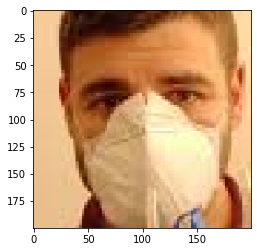

Mask


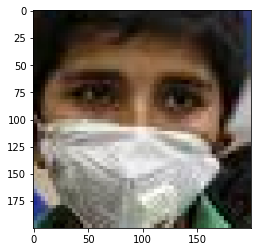

Mask


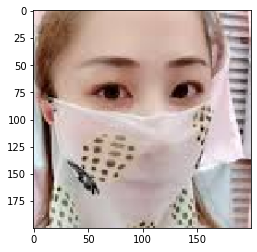

Mask


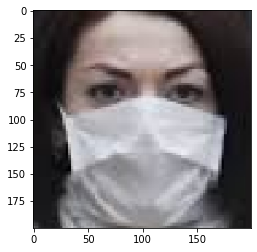

Mask


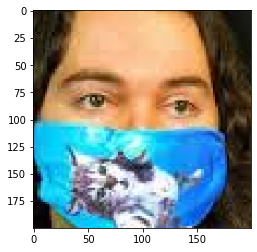

Mask


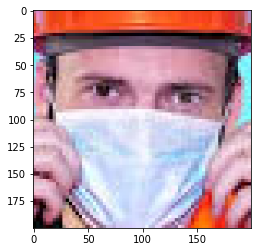

Mask


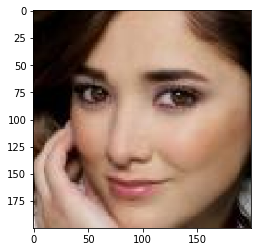

Without Mask


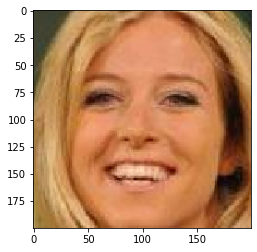

Without Mask


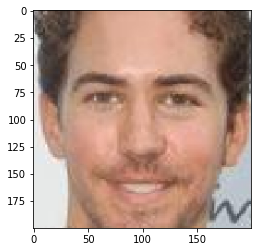

Without Mask


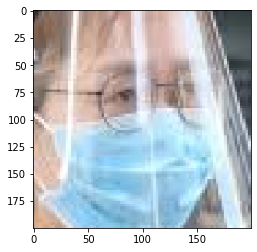

Mask


In [10]:
dir_path = 'C:\\Users\\91735\\Downloads\\archive (6)\\Face Mask Dataset\\testing_2\\'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val=model.predict(images)
    if val ==0:
        print("Mask")
    else:
        print("Without Mask")

In [11]:
import pickle
pickle.dump(val, open('mask.pkl','wb'))